Importer les Bibliothèques Nécessaires

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

Lire le jeu de données et supprimer les colonnes Id, Alley et Fence, car Id n'est pas nécessaire et Alley ainsi que Fence contiennent beaucoup de valeurs manquantes et ne sont pas utiles dans le dataset, car elles n'influencent pas beaucoup le prix


In [25]:
train = pd.read_csv("..//Housing-prices-competition//home-data-for-ml-course/train.csv")
test = pd.read_csv("..//Housing-prices-competition//home-data-for-ml-course/test.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()
#  supprimer la colonne "Id"
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
# supprimer la colonne "Alley"
# Alley : Cela signifie "allée". Une allée est une petite voie d'accès qui mène à la maison
# train.drop("Alley", axis = 1, inplace = True)
# supprimer la colonne "Fence"
# Fence : Cela signifie "clôture". Une clôture est une barrière qui entoure la propriété
# train.drop("Fence", axis = 1, inplace = True)
train.info() 
train.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Vérification de la Cohérence des Données (Sanity Check)

In [26]:
train.isnull().sum()
# Toutes les valeurs sont à 0 : Cela signifie qu'il n'y a aucune valeur manquante (ou nulle) dans votre DataFrame pour les colonnes listées.
train.dtypes 
# on a deux types existent (int64 , object )

train.shape

(1460, 80)

Vérification des types de données et conversion

In [27]:

train['MSZoning'] = train['MSZoning'].astype(str).str.strip()
train['LotFrontage'] = train['LotFrontage'].astype(str).str.strip()
train['MasVnrArea'] = train['MasVnrArea'].astype(str).str.strip()
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str).str.strip()


# Assurez-vous que vous appliquez .str.strip() uniquement sur les colonnes de type chaîne
test['MSZoning'] = test['MSZoning'].astype(str).str.strip()
test['LotFrontage'] = test['LotFrontage'].astype(str).str.strip()
test['MasVnrArea'] = test['MasVnrArea'].astype(str).str.strip()
test['GarageYrBlt'] = test['GarageYrBlt'].astype(str).str.strip()



# Convertir les colonnes contenant des nombres sous forme de texte en int ou float

train['LotFrontage'] = pd.to_numeric(train['LotFrontage'], errors='coerce') 
train['MasVnrArea'] = pd.to_numeric(train['MasVnrArea'], errors='coerce')
train['GarageYrBlt'] = pd.to_numeric(train['GarageYrBlt'], errors='coerce')


test['LotFrontage'] = pd.to_numeric(test['LotFrontage'], errors='coerce') 
test['MasVnrArea'] = pd.to_numeric(test['MasVnrArea'], errors='coerce')
test['GarageYrBlt'] = pd.to_numeric(test['GarageYrBlt'], errors='coerce')


 Détection et gestion des valeurs aberrantes

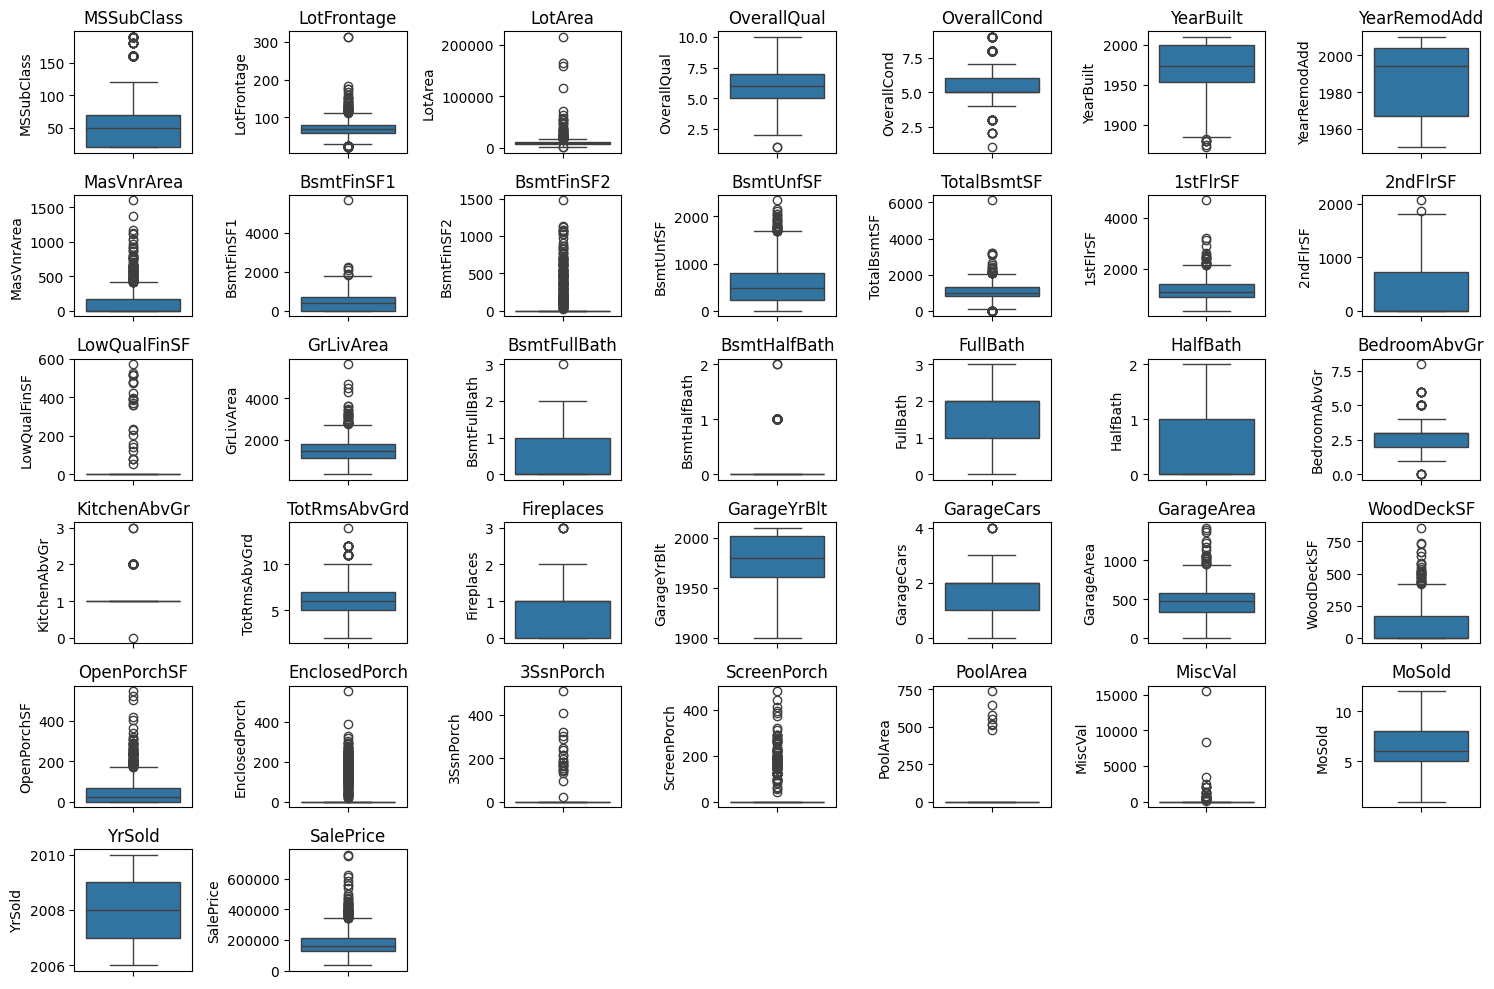

In [28]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

test_numeric_colomuns = test.select_dtypes(include=['int64', 'float64']).columns
# Affichage des boxplots avant suppression des outliers


# Définir le nombre de colonnes (ici, 7)
n_cols = 7

# Calculer le nombre de lignes nécessaires pour afficher toutes les colonnes
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Affichage des boxplots avant suppression des outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    # Crée un sous-graphe pour chaque boxplot
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=train[column])
    plt.title(column)

plt.tight_layout()
plt.show()


stratégie pour traiter les outliers

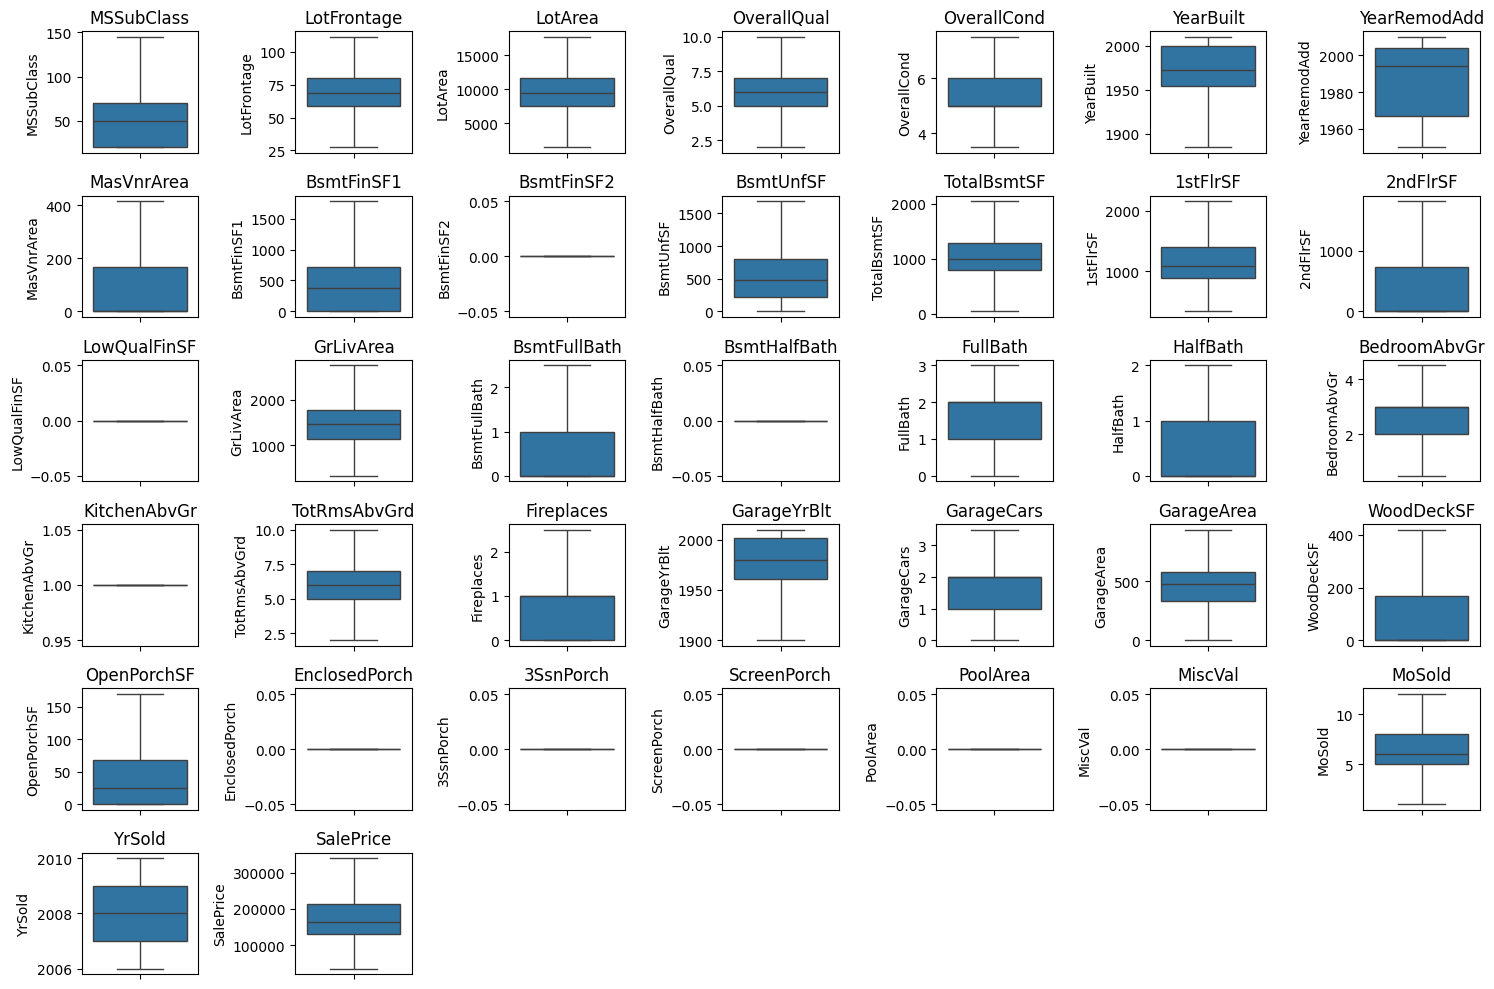

In [29]:
def cap_outliers_iqr(df, columns):
    df = df.copy()  
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Définir le nombre de colonnes (ici, 7)
n_cols = 7

# Calculer le nombre de lignes nécessaires pour afficher toutes les colonnes
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Appliquer Winsorization sur les colonnes numériques

train_corrected = cap_outliers_iqr(train, numeric_columns)
test_coorected = cap_outliers_iqr(test,test_numeric_colomuns);
# Affichage des boxplots après correction des outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=train_corrected[column])
    plt.title(column)

plt.tight_layout()
plt.show()


Analyse de la corrélation

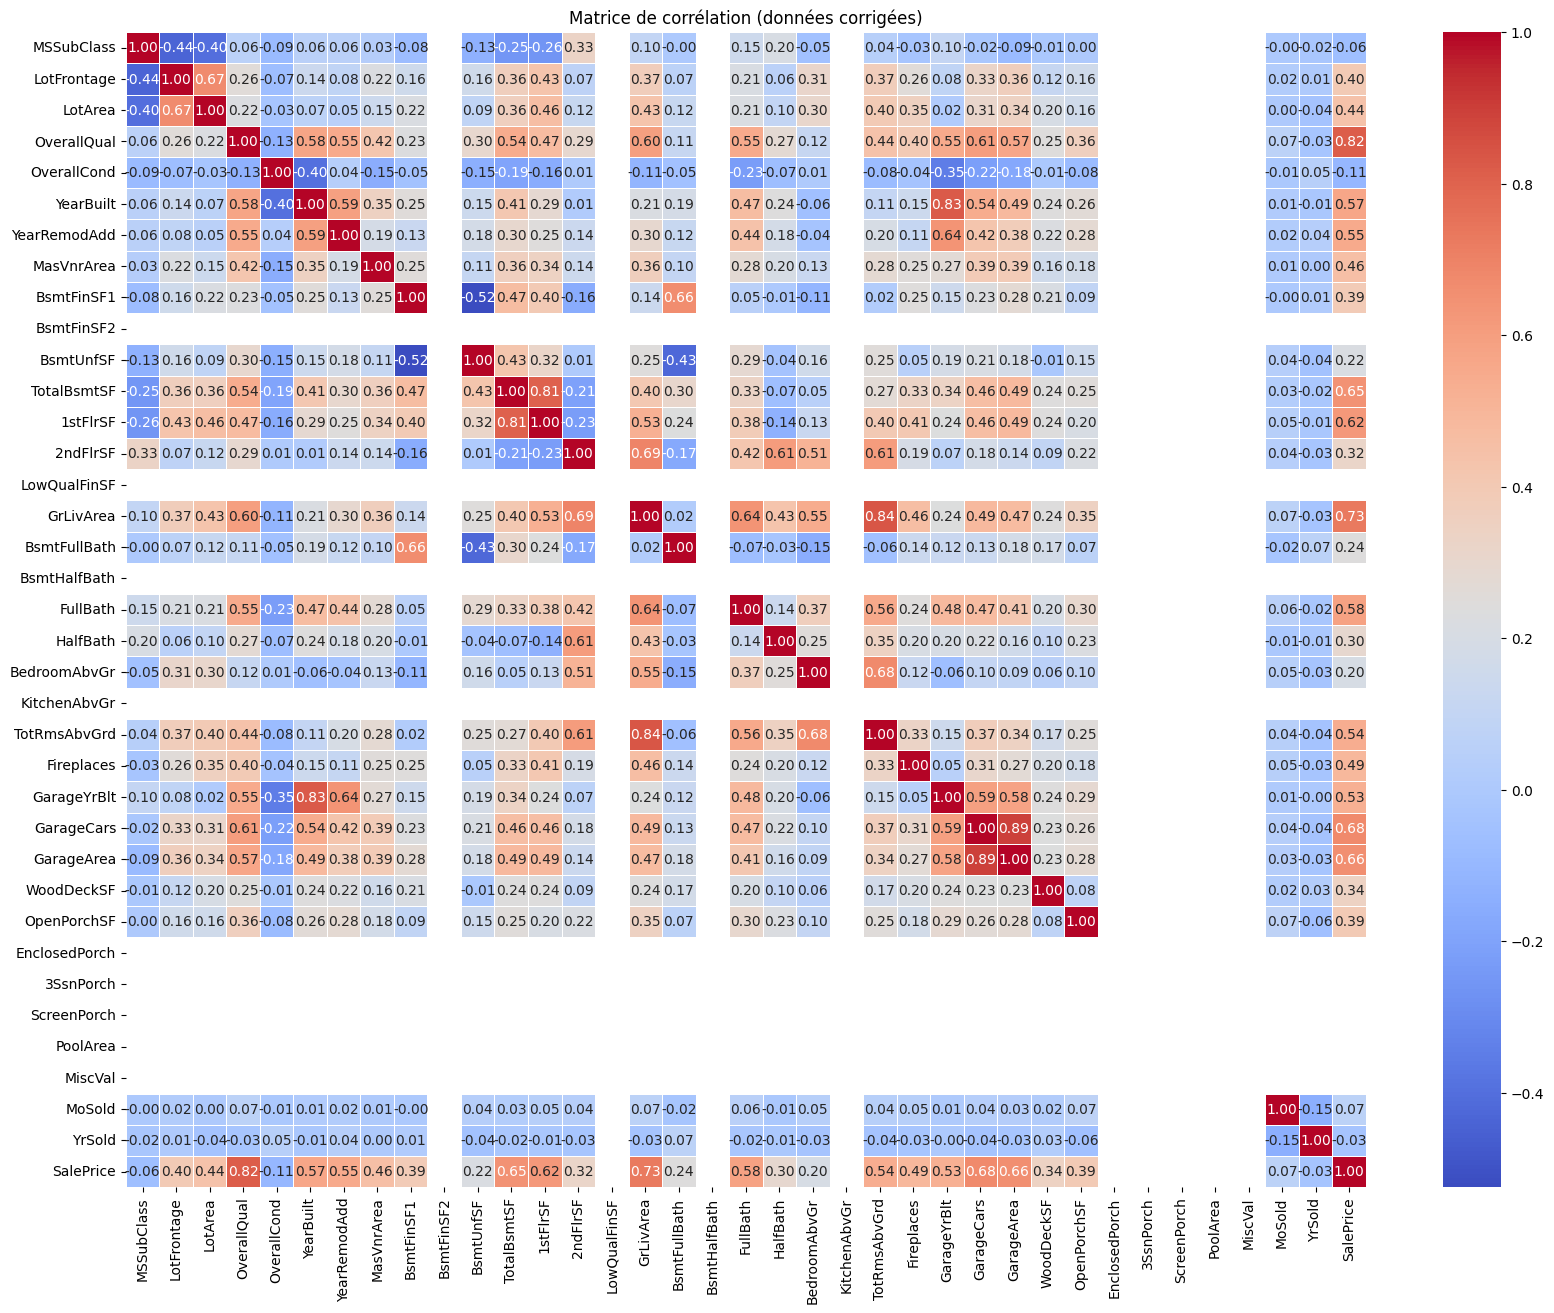

In [30]:
numeric_data = train_corrected.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation (données corrigées)')
plt.show()



Remarques :

- GarageCars et GarageArea (0.89) donc on peut droper GarageArea
- TotalBsmtSF et 1stFlrSF (0.82) : Ces deux représentent des surfaces, TotalBsmtSF est plus pertinent car il inclut la totalité du sous-sol.
- GrLivArea et TotRmsAbvGrd (0.83) : Les deux sont liés à l'espace habitable, mais GrLivArea est plus précis
- YearBuilt et GarageYrBlt (0.82) : Les maisons récentes ont souvent des garages récents, mais YearBuilt est plus général et important pour l'âge de la maison.
  


 Extraction des couples de variables ayant une corrélation supérieure à 0.8

In [31]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in correlation_matrix.columns:
    corr_pairs[col] = []
    corr_values = correlation_matrix[abs(correlation_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

OverallQual - SalePrice
YearBuilt - GarageYrBlt
TotalBsmtSF - 1stFlrSF
1stFlrSF - TotalBsmtSF
GrLivArea - TotRmsAbvGrd
TotRmsAbvGrd - GrLivArea
GarageYrBlt - YearBuilt
GarageCars - GarageArea
GarageArea - GarageCars
SalePrice - OverallQual


 Extraction des couples de variables ayant une corrélation supérieure à - 0.8

In [32]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = -0.8
corr_pairs = {}

for col in correlation_matrix.columns:
    corr_pairs[col] = []
    corr_values = correlation_matrix[abs(correlation_matrix[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inférieure à -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
if len(corr_values) == 0 :
    print("Aucun corelation")
else :  
    for col, pairs in corr_pairs.items():
        if len(pairs) > 0:
             for pair in pairs:
                  print(col, "-", pair)


Couples de variables ayant une corrélation inférieure à -0.8 :

Aucun corelation


In [33]:
train_corrected.drop("GarageArea", axis = 1, inplace = True)
train_corrected.drop("1stFlrSF", axis = 1, inplace = True)
train_corrected.drop("TotRmsAbvGrd", axis = 1, inplace = True)
train_corrected.drop("GarageYrBlt", axis = 1, inplace = True)

test_coorected.drop("GarageArea", axis = 1, inplace = True)
test_coorected.drop("1stFlrSF", axis = 1, inplace = True)
test_coorected.drop("TotRmsAbvGrd", axis = 1, inplace = True)
test_coorected.drop("GarageYrBlt", axis = 1, inplace = True)

train_corrected.head()
print(train_corrected.shape , test.shape)

(1460, 76) (1459, 79)



Encodage des variables catégorielles

In [34]:
categorical_data = train_corrected.select_dtypes(include=['object', 'category'])

testcatdata = test_coorected.select_dtypes(include=['object', 'category']) #

categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

test_data_encoded = pd.get_dummies(testcatdata, drop_first=True) #

numeric_data = train_corrected.select_dtypes(include=['float64', 'int64'])

test_num_data = test_coorected.select_dtypes(include=['float64', 'int64']) #

final_data = pd.concat([numeric_data, categorical_data_encoded], axis=1)
final_data.fillna(final_data.mean(), inplace=True)

testfinaldata = pd.concat([test_num_data, test_data_encoded], axis=1) #
testfinaldata.fillna(final_data.mean(), inplace=True) #

categorical_data_encoded.fillna(categorical_data_encoded.mode().iloc[0], inplace=True)

test_data_encoded.fillna(test_data_encoded.mode().iloc[0], inplace=True) #

# final data
final_data.to_csv('final_data.csv', index=False)
testfinaldata.to_csv('test_final_file.csv', index=False) #

print(final_data.shape,testfinaldata.shape)

(1460, 258) (1459, 223)


final data
